In [13]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jonathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jonathan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jonathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocessing Function

In [15]:
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Load Raw Data

In [16]:
with open('/home/jonathan/workdir/project/mlops/topic_modelling/data/scholar_results.txt', 'r', encoding='utf-8') as file:
    judul_list = [line.strip() for line in file if line.strip()]

df = pd.DataFrame(judul_list, columns=['judul'])

df['cleaned_judul'] = df['judul'].astype(str).apply(preprocess_text)

In [17]:
df.head()

,judul,cleaned_judul
0,Improved baselines with visual instruction tuning,improved baseline visual instruction tuning
1,Scaling instruction-finetuned language models,scaling instructionfinetuned language model
2,Accurate structure prediction of biomolecular ...,accurate structure prediction biomolecular int...
3,A survey on evaluation of large language models,survey evaluation large language model
4,Non-cooperative games,noncooperative game


# Exploratory Data Analysis (EDA)

In [18]:
print("Total:", len(df))
print("Rata-rata panjang judul (dalam kata):", np.mean(df['cleaned_judul'].apply(lambda x: len(x.split()))))

Total: 376
Rata-rata panjang judul (dalam kata): 5.925531914893617


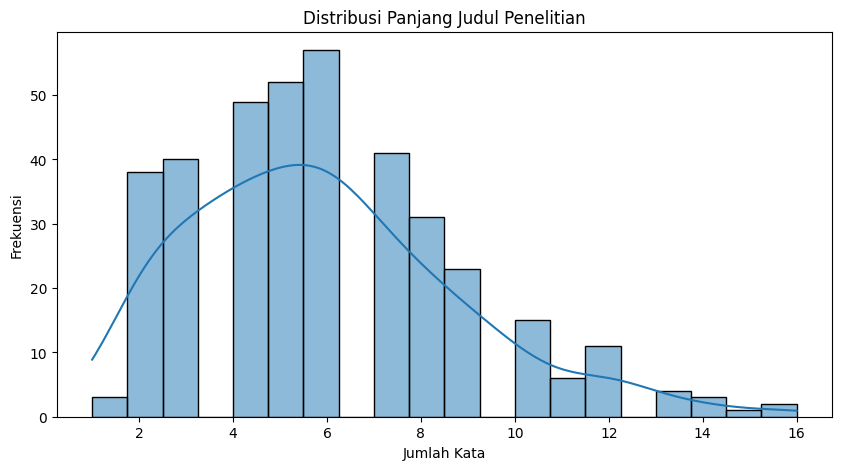

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df['cleaned_judul'].apply(lambda x: len(x.split())), bins=20, kde=True)
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Judul Penelitian")
plt.show()

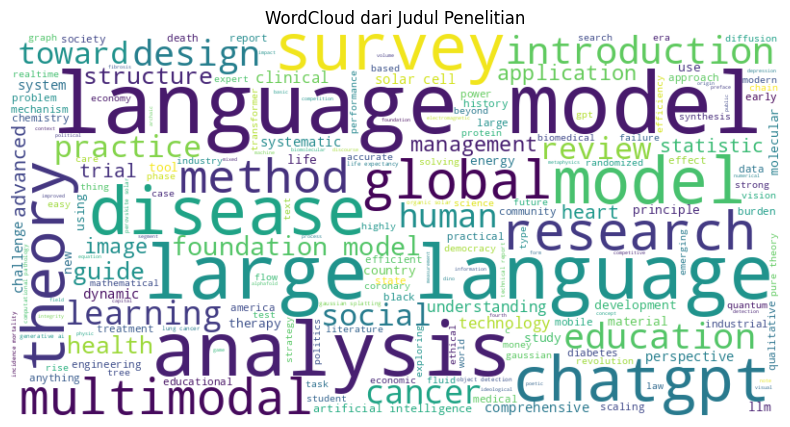

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_judul']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Judul Penelitian")
plt.show()

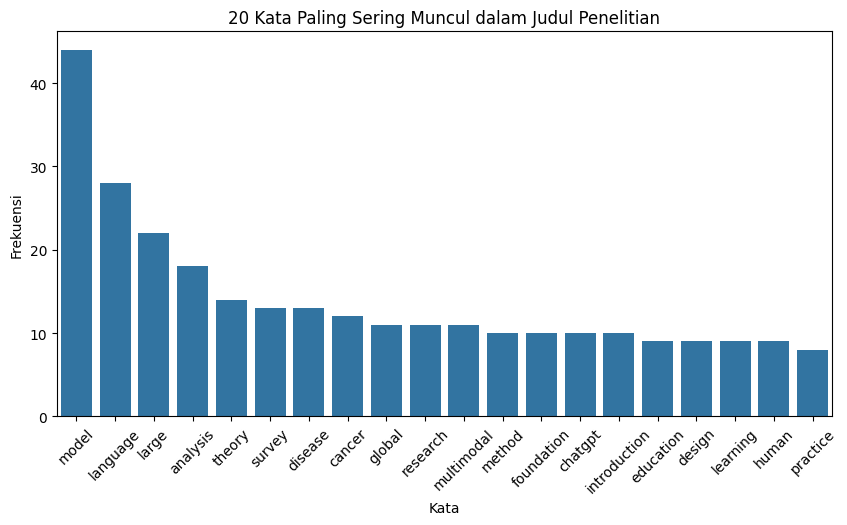

In [21]:
token_list = " ".join(df['cleaned_judul']).split()
word_counts = Counter(token_list)
most_common_words = word_counts.most_common(20)

plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.xticks(rotation=45)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("20 Kata Paling Sering Muncul dalam Judul Penelitian")
plt.show()

In [22]:
df.to_csv('/home/jonathan/workdir/project/mlops/topic_modelling/data/preprocessed/preprocessed_data.csv', index=False)

print("Preprocessing dan EDA selesai!")

Preprocessing dan EDA selesai!
